# 고객 취향분석
## User Data 분석

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('data/2019-Oct_user.csv')
data.head()

,user_id,purchase_count,total_spent,avg_spent,max_spent,min_spent,first_purchase,last_purchase,duration,category_count
0,264649825,2,1240.04,620.02,687.90,552.14,2019-10-06 15:29:00+00:00,2019-10-06 20:36:11+00:00,0 days 05:07:11,0
1,303160429,1,340.59,340.59,340.59,340.59,2019-10-13 13:25:29+00:00,2019-10-13 13:25:29+00:00,0 days 00:00:00,1
2,340041246,4,915.52,228.88,339.70,174.78,2019-10-03 11:59:28+00:00,2019-10-14 14:45:39+00:00,11 days 02:46:11,1
3,371877401,1,29.89,29.89,29.89,29.89,2019-10-09 15:51:08+00:00,2019-10-09 15:51:08+00:00,0 days 00:00:00,0
4,384989212,1,41.44,41.44,41.44,41.44,2019-10-18 11:19:59+00:00,2019-10-18 11:19:59+00:00,0 days 00:00:00,1


In [3]:
# purchase_count와 total_spent만을 활용하여 군집화

#
# 변수 표준화 
from sklearn.preprocessing import StandardScaler

df_train_data = data[['user_id','purchase_count','total_spent']]

scaler = StandardScaler()

scaler.fit(df_train_data)
np_train_scaled = scaler.transform(df_train_data)
np_train_scaled

array([[-14.66854649,  -0.03848208,   0.27842875],
       [-12.58673177,  -0.31326088,  -0.1551733 ],
       [-10.59302044,   0.51107553,   0.12198588],
       ...,
       [  1.63675406,  -0.31326088,   0.65039274],
       [  1.63688159,  -0.31326088,  -0.28350158],
       [  1.63695175,  -0.31326088,   0.48140628]])

In [4]:
# 최적의 cluster 개수 찾기

kmeans_per_k = [KMeans(n_clusters=k).fit(np_train_scaled) for k in range(1, 11)]
inertias = [model.inertia_ for model in kmeans_per_k]

/Users/jongwoom1pro/opt/anaconda3/envs/automl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jongwoom1pro/opt/anaconda3/envs/automl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jongwoom1pro/opt/anaconda3/envs/automl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jongwoom1pro/opt/anaconda3/envs/automl/lib/python3.8/site-packages/sklearn/

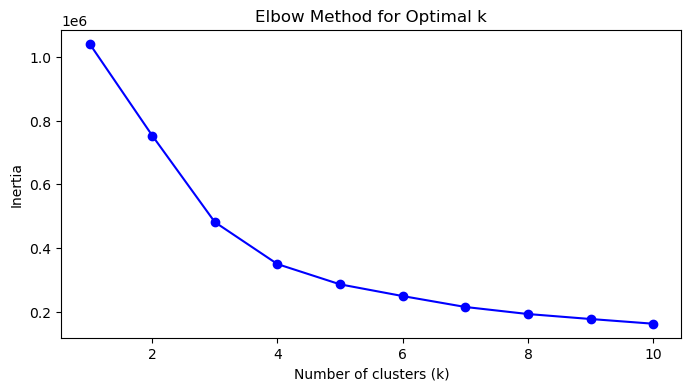

In [14]:
# Elbow Method 그래프 그리기 (Elbow Method는 최적의 클러스터 개수를 찾기 위한 방법 중 하나)
plt.figure(figsize=(8, 4))
plt.plot(range(1,11), inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [15]:
# silhouette_score (가능하면 pass, 오래걸림)

# from sklearn.metrics import silhouette_score
# silhouette_score(np_train_scaled, kmeans.labels_)

In [16]:
# 8개 군집
kmeans = KMeans(n_clusters=8, random_state = 1111)
y_pred = kmeans.fit_predict(np_train_scaled)
kmeans.cluster_centers_
y_pred

/Users/jongwoom1pro/opt/anaconda3/envs/automl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [17]:
pd.DataFrame(y_pred)
#pd.concat(df_train_data, pd.DataFrame(y_pred))
df_train_data['clst_k8'] = pd.Series(y_pred)
df_train_data.head()

/var/folders/s3/qf7_0f3s7137frvkybd7gfqh0000gn/T/ipykernel_4420/1990686405.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_data['clst_k8'] = pd.Series(y_pred)


,user_id,purchase_count,total_spent,clst_k8
0,264649825,2,1240.04,0
1,303160429,1,340.59,0
2,340041246,4,915.52,0
3,371877401,1,29.89,0
4,384989212,1,41.44,0


In [18]:
# 각 군집별 비율 확인하기
round(df_train_data.groupby('clst_k8').user_id.count()/df_train_data.shape[0],3)

clst_k8
0    0.412
1    0.314
2    0.011
3    0.049
4    0.212
5    0.002
6    0.000
7    0.000
Name: user_id, dtype: float64